In [1]:
#Load packacges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from tensorflow.keras import layers, models
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

import warnings
warnings.filterwarnings("ignore")

### 1. Load Data 

In [2]:
#Load train and test data
data_train = np.load('MLProject2024/fashion_train.npy')
data_test = np.load('MLProject2024/fashion_test.npy')
class_mapping = {0:'Top',1:'Trouser',2:'Pullover',3:'Dress',4:'Shirt'}

print("Shape of the data:", data_train.shape)

train_images = data_train[:, :-1] 
train_labels = data_train[:, -1]  

test_images = data_test[:, :-1]
test_labels = data_test[:, -1]


print("Shape of images:", train_images.shape)
data_train[:10]

Shape of the data: (10000, 785)
Shape of images: (10000, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [3]:
train_df = pd.DataFrame(data_train)
train_df.iloc[:,-1].replace(class_mapping, inplace=True)

In [4]:
test_df = pd.DataFrame(data_test)
test_df.iloc[:,-1].replace(class_mapping, inplace=True)

In [5]:
mean = np.mean(data_train)
median = np.median(data_train)
minn = np.min(data_train)
maxx = np.max(data_train)
std = np.std(data_train)
print(f"{mean}, {median}, {minn}, {maxx}, {std}")

76.93116420382165, 14.0, 0, 255, 89.97942562765583


In [6]:
x = train_df.loc[:, :783].values
x = preprocessing.StandardScaler().fit_transform(x)
x.shape

x_test = test_df.loc[:, :783].values
x_test = preprocessing.StandardScaler().fit_transform(x_test)

flattened_scaled_pixels = x.flatten()

### 2. PCA

In [7]:
#PCA for all features
pca_all = decomposition.PCA()
pca_train_all = pca_all.fit_transform(x)
pca_test_all = pca_all.transform(x_test)

In [8]:
# pca with all features for test
# pca_train_all and  pca_test_all are already defined

# pca with 2 features for train and test
pca_2 = decomposition.PCA(2)
pca_train_2 = pca_2.fit_transform(x)
pca_test_2 = pca_2.transform(x_test)

# pca with 110 features for train and test
pca_110 = decomposition.PCA(110)
pca_train_110 = pca_110.fit_transform(x)
pca_test_110 = pca_110.transform(x_test)

#pca with 10 freatures for train and test
pca_10 = decomposition.PCA(10)
pca_train_10 = pca_10.fit_transform(x)
pca_test_10 = pca_10.transform(x)


### 3. knn implementation 

###### 3.1. Data definition


Use the next code chunk for calcuating the metrics with **raw data**

In [14]:
# X_train, y_train = data_train[:, : -1], data_train[:, -1]
# X_test, y_test = data_train[:, : -1], data_train[:, -1]
# num_of_features = 'raw data with no'

Use the next code chunk for calcuating the metrics with **full pca** data

In [15]:
# # #defining the X an y training and testing data (with PCA)
# # - why do we have worse results pca_data 
# X_train, y_train = pca_train_all, train_labels
# X_test, y_test = pca_test_all, test_labels
# num_of_features = 'all'

Use this code chunk for calcuating the metrics with **pca data with 2** features

In [16]:
# # #defining the X an y training and testing data (with PCA)
# # - why do we have worse results pca_data ??
# X_train, y_train = pca_train_2, train_labels
# X_test, y_test = pca_test_2, test_labels
# num_of_features = '2'

Use this code chunk for calcuating the metrics with **pca data with 110** features

In [9]:
# #defining the X an y training and testing data (with PCA)
# - why do we have worse results pca_data ??
X_train, y_train = pca_train_110, train_labels
X_test, y_test = pca_test_110, test_labels
num_of_features = '110'

###### 3.2 Calculating the metrics for knn

In [10]:
# make predictions and measure accuracy for each model:
knn_fit = []
k_values = [i for i in range(1,31)]
accuracy_values, recall_values, precision_values, f1_scores = [], [], [], []
y_pred = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_fit.append(knn.fit(X_train, y_train))
    pred = knn.predict(X_test)
    y_pred.append(pred)
    accuracy_values.append(accuracy_score(y_test, pred))
    recall_values.append(recall_score(y_test, pred, average='macro'))
    precision_values.append(precision_score(y_test, pred, average='macro'))
    f1_scores.append(f1_score(y_test, pred, average='macro'))



In [11]:
#creating a table with all the scores calcualted before

print("{:<10} | {:^10} | {:^10} | {:^10} | {:^10}".format("Neighbors", "Accuracy", "Recall", "Precision", "F1"))
print("-" * 60)
for i in range(len(k_values)):
    print("{:<10} | {:^10.5f} | {:^10.5f} | {:^10.5f} | {:^10.5f}".format(
        k_values[i], accuracy_values[i], recall_values[i], precision_values[i], f1_scores[i]
    ))

Neighbors  |  Accuracy  |   Recall   | Precision  |     F1    
------------------------------------------------------------
1          |  0.81380   |  0.81380   |  0.81569   |  0.81465  
2          |  0.80920   |  0.80920   |  0.81524   |  0.80231  
3          |  0.81840   |  0.81840   |  0.82031   |  0.81848  
4          |  0.82420   |  0.82420   |  0.82468   |  0.82110  
5          |  0.82840   |  0.82840   |  0.82838   |  0.82739  
6          |  0.82900   |  0.82900   |  0.82822   |  0.82663  
7          |  0.82620   |  0.82620   |  0.82589   |  0.82527  
8          |  0.82880   |  0.82880   |  0.82783   |  0.82673  
9          |  0.82700   |  0.82700   |  0.82661   |  0.82575  
10         |  0.83060   |  0.83060   |  0.82991   |  0.82881  
11         |  0.83040   |  0.83040   |  0.83009   |  0.82936  
12         |  0.83020   |  0.83020   |  0.82953   |  0.82854  
13         |  0.82900   |  0.82900   |  0.82857   |  0.82787  
14         |  0.83040   |  0.83040   |  0.82981   |  0.82

In [12]:
#calcuating the highest precision neighbour
max_index = precision_values.index(max(precision_values))
# max_index = accuracy_values.index(max(accuracy_values))
max_index

20

###### 3.3. Plotting and evaluation

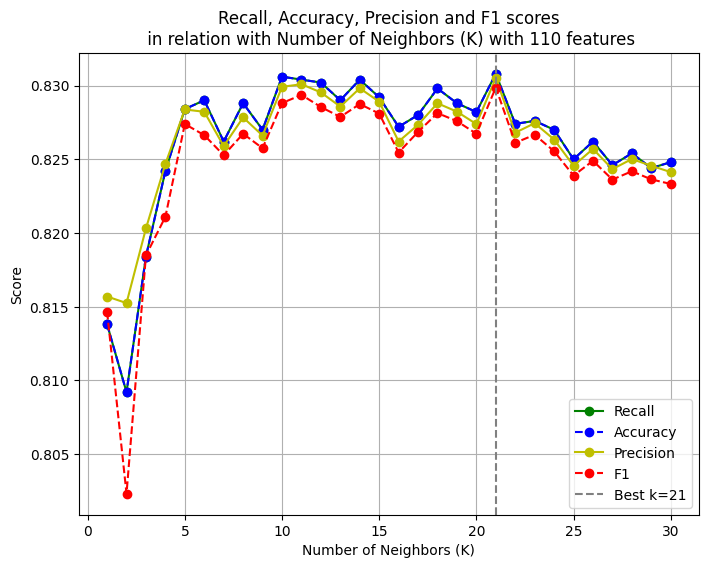

In [14]:
# Plotting Recall and Accuracy on the same plot
plt.figure(figsize=(8, 6))

plt.plot(k_values, recall_values, marker='o', linestyle='-', color='g', label='Recall')
plt.plot(k_values, accuracy_values, marker='o', linestyle='--', color='b', label='Accuracy')
plt.plot(k_values, precision_values, marker='o', linestyle='-', color='y', label='Precision')
plt.plot(k_values, f1_scores, marker='o', linestyle='--', color='r', label='F1')
plt.axvline(k_values[max_index], color='gray', linestyle='--', label=f'Best k={k_values[max_index]}')

plt.title(f'Recall, Accuracy, Precision and F1 scores\n in relation with Number of Neighbors (K) with {num_of_features} features')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='best')
plt.show()

As accuracy and recall and are basically almost the same, it can mean these things:
1. Balanced Classes
2. High model performance
3. Few false negatives

In [18]:
print(f"The plot show that the best measure what we can use is accuracy with value {accuracy_values[max_index]}, with {k_values[max_index]} neighbours. ")

The plot show that the best measure what we can use is accuracy with value 0.8308, with 21 neighbours. 


###### 3.4. Cross-validation

In [20]:
# cross validation with k = 7 fold
cv_values = []
cv_means = []

for knn_classifies in knn_fit:
    cv_values.append(cross_val_score(knn_classifies, x, train_labels, cv=7, scoring='accuracy'))
for i in range(len(k_values)):
    cv_means.append(cv_values[i].mean())

In [21]:
print(f"For {k_values[max_index]} neighbors the cross validation scores for accurcay are {cv_values[max_index]}")
print(f"With their mean {cv_means[max_index]}")
print(60*'-')

For 21 neighbors the cross validation scores for accurcay are [0.83205038 0.82925122 0.82435269 0.81945416 0.84103641 0.79761905
 0.84033613]
With their mean 0.8263000091569167
------------------------------------------------------------


In [ ]:
final_model = KNeighborsClassifier(n_neighbors=max_index).fit(x, train_labels)
y_test_pred = final_model.predict(x_test)
test_accuracy = accuracy_score(test_labels,y_test_pred)

print(f"Best number of neighbors (k) based on CV accuracy: {max_index+1}")
print(f"Test set accuracy with best k: {test_accuracy}")

Best number of neighbors (k) based on CV accuracy: 21
Test set precision with best k: 0.8196


###### 3.5. Confusion matrix and decision boundaries

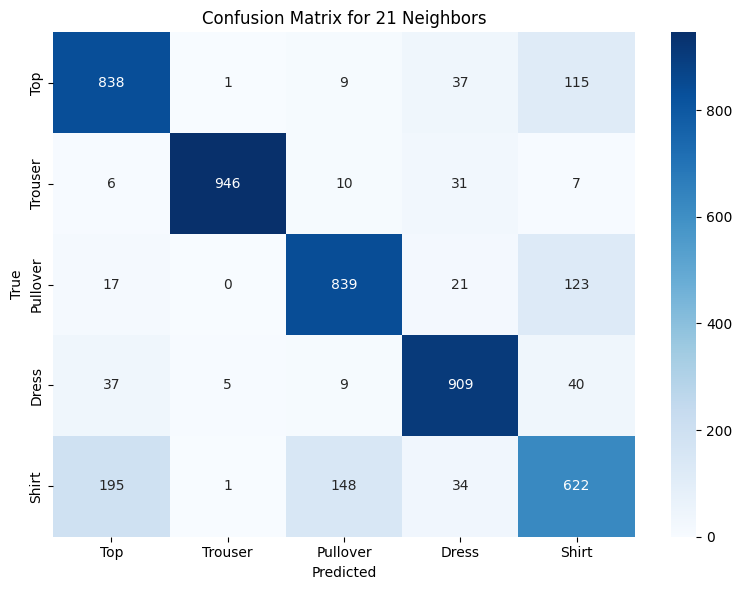

In [22]:
# Confusion matrix for best k
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(class_mapping.values()), yticklabels=list(class_mapping.values()))
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(test_labels, y_pred[max_index], f'Confusion Matrix for {k_values[max_index]} Neighbors')


### 4. Convolutional Neural Network implementation

#### 4.1. Data definition

In [23]:

X_train, y_train = data_train[:, : -1], data_train[:, -1]
X_test, y_test = data_test[:, : -1], data_test[:, -1]

# reshaping the data
X_train = np.array(X_train).reshape((X_train.shape[0], 28, 28, 1))
X_test = np.array(X_test).reshape((X_test.shape[0], 28, 28, 1))


#splitting train data into: train, validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)  # 20% of total for validation


# normailze data
X_train, X_test, X_val = X_train/255.0, X_test/255.0, X_val/255.0

#### 4.2 CNN model definition

In [35]:
def create_model(): 
    model_cnn = models.Sequential()
    #1st layer
    model_cnn.add(layers.Conv2D(8, (3, 3), activation='relu',kernel_regularizer= l2(0.01), input_shape=(28, 28, 1)))
    model_cnn.add(layers.BatchNormalization())
    model_cnn.add(layers.MaxPooling2D((2, 2)))

    #2nd layer
    model_cnn.add(layers.Conv2D(16, (3, 3), activation='relu'))
    model_cnn.add(layers.MaxPooling2D((2, 2)))

    model_cnn.add(layers.Flatten())
    model_cnn.add(layers.Dense(16, activation='relu', kernel_regularizer= l2(0.01))) 
    # Drop-out
    model_cnn.add(layers.Dropout(0.5))
    model_cnn.add(layers.Dense(5, activation='softmax'))

    model_cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model_cnn

model_cnn = create_model()
model_cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,781 (30.39 KB)

 Trainable params: 7,765 (30.33 KB)

 Non-trainable params: 16 (64.00 B)

#### 4.3 Training the model

In [25]:
#test prediction
pred_cnn = model_cnn(X_train[:1]).numpy()
pred_index = pred_cnn.argmax()
true_label = y_train[:1].item() 

if pred_index == true_label:
    print(f'The model classified the image correctly as {class_mapping[pred_index]}')
else:
    print(f'The model classified the image incorrectly as {class_mapping[pred_index]}.\nThe correct class is {class_mapping[true_label]}')


The model classified the image incorrectly as Shirt.
The correct class is Pullover


##### 4.3.1. Separate validation set, without early stopping

In [30]:
#training the model with separate validation set, without early stopping
trained_cnn = model_cnn.fit(X_train,y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4366 - loss: 1.5163 - val_accuracy: 0.6820 - val_loss: 1.2130
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6435 - loss: 0.9745 - val_accuracy: 0.7945 - val_loss: 0.7681
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6690 - loss: 0.8560 - val_accuracy: 0.7970 - val_loss: 0.6117
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6873 - loss: 0.8104 - val_accuracy: 0.8080 - val_loss: 0.5614
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6969 - loss: 0.7590 - val_accuracy: 0.8365 - val_loss: 0.5574
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7249 - loss: 0.7089 - val_accuracy: 0.8525 - val_loss: 0.4877
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7428 - loss: 0.6723 - val_accuracy: 0.8495 - val_loss: 0.4888
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7546 - loss: 0.6596 - val_accu

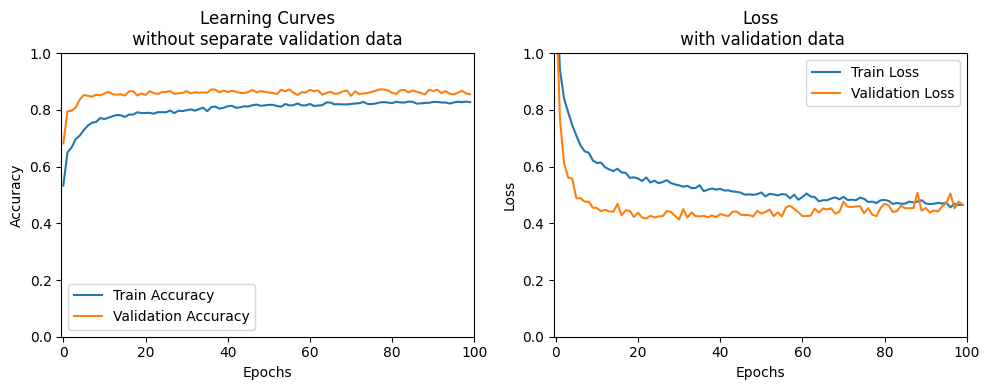

In [31]:
# learning curve and loss for validation set model
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].plot(trained_cnn.history['accuracy'], label='Train Accuracy')
axes[0].plot(trained_cnn.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0, 1])
axes[0].set_xlim([-0.5, 100])
axes[0].legend()
axes[0].set_title('Learning Curves\n without separate validation data ')

#  - for separate X_val
axes[1].plot(trained_cnn.history['loss'], label='Train Loss')
axes[1].plot(trained_cnn.history['val_loss'], label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_ylim([0, 1])
axes[1].set_xlim([-0.5, 100])
axes[1].legend()
axes[1].set_title('Loss\n with validation data')

fig.tight_layout()
plt.show()

##### 4.3.2. Separate validation set, with early stopping

In [33]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

In [37]:
trained_cnn_2 = model_cnn.fit(X_train,y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4906 - loss: 1.4744 - val_accuracy: 0.7220 - val_loss: 1.2546
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6502 - loss: 0.9979 - val_accuracy: 0.7795 - val_loss: 0.8201
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6854 - loss: 0.8694 - val_accuracy: 0.7860 - val_loss: 0.6366
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6973 - loss: 0.8062 - val_accuracy: 0.8250 - val_loss: 0.6007
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7215 - loss: 0.7538 - val_accuracy: 0.8290 - val_loss: 0.5401
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7436 - loss: 0.7113 - val_accuracy: 0.8385 - val_loss: 0.5232
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7441 - loss: 0.6847 - val_accuracy: 0.8405 - val_loss: 0.5110
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7455 - loss: 0.6729 - val_accu

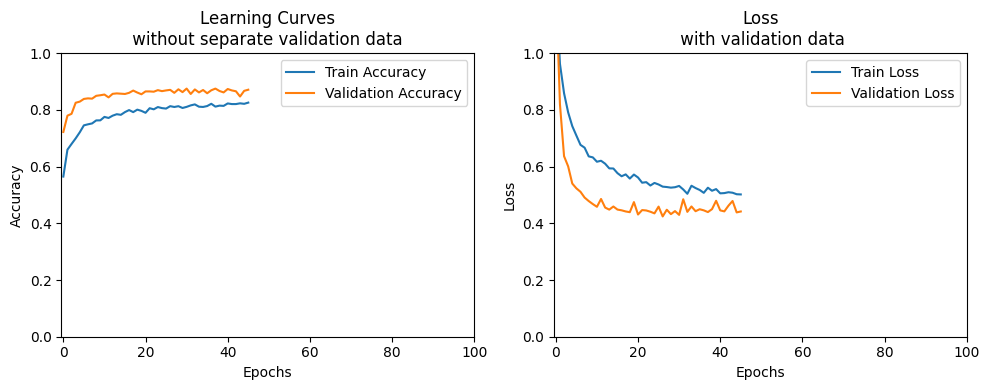

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].plot(trained_cnn_2.history['accuracy'], label='Train Accuracy')
axes[0].plot(trained_cnn_2.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0, 1])
axes[0].set_xlim([-0.5, 100])
axes[0].legend()
axes[0].set_title('Learning Curves\n without separate validation data ')

#  - for separate X_val
axes[1].plot(trained_cnn_2.history['loss'], label='Train Loss')
axes[1].plot(trained_cnn_2.history['val_loss'], label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_ylim([0, 1])
axes[1].set_xlim([-0.5, 100])
axes[1].legend()
axes[1].set_title('Loss\n with validation data')

fig.tight_layout()
plt.show()

In [42]:
max_train_accuracy = max(trained_cnn_2.history['accuracy'])
print("Max training accuracy:", max_train_accuracy)
max_val_accuracy = max(trained_cnn_2.history['val_accuracy'])
print("Max validation accuracy:", max_val_accuracy)
max_val_epoch = trained_cnn_2.history['val_accuracy'].index(max_val_accuracy) + 1
print("Epoch with max validation accuracy:", max_val_epoch)

Max training accuracy: 0.8255000114440918
Max validation accuracy: 0.875
Epoch with max validation accuracy: 31


#### 4.4 Testing the model

In [43]:
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)

157/157 - 1s - 5ms/step - accuracy: 0.8600 - loss: 0.4486


In [44]:
# make predictions
predictions = model_cnn.predict(X_test)
predicted_classes = predictions.argmax(axis=1)

accuracy_cnn = accuracy_score(y_test, predicted_classes)
accuracy_cnn

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0.86

#### 4.5 Cross-validation

In [45]:
#Keras wrapper simplifies parameter passing, simplifies Cross-Validation, makes keras modles compatible with scikit-learn
keras_model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=1)

# 3-fold cross-validation
scores = cross_val_score(keras_model, X_train, y_train, cv=5)

# summary
scores_df = pd.DataFrame({'Fold': [f'Fold {i+1}' for i in range(len(scores))],
                          'Accuracy': scores})
print(scores_df)


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4930 - loss: 1.4693
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6600 - loss: 0.9713
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6771 - loss: 0.8897
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6972 - loss: 0.8271
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7113 - loss: 0.7832
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7283 - loss: 0.7376
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7364 - loss: 0.7071
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7363 - loss: 0.6775
Epoch 9/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7562 - loss: 0.6768
Epoch 10/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7669 - loss: 0.6400
Epoch 11/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7759 - loss: 0.6177
Epoch 12/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

##### 4.6 Confusion matrix

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


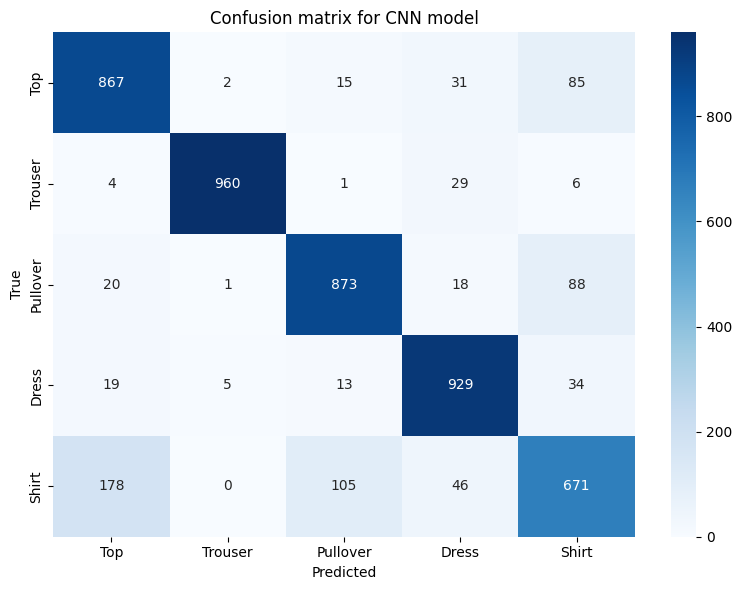

In [52]:
# predictions
y_pred = model_cnn.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  

title_cnn = 'Confusion matrix for CNN model'
plot_confusion_matrix(y_test, y_pred_classes, title_cnn)